In [1]:
import pandas as pd 
import numpy as np 
import geopandas as gpd
import geoplot as gplt

In [ ]:
## Garbage in Garbage

# Session3: Data Exploreation
- Time data formatting, Time data substraction, subsetting and so on 
- Geographical Datatypes in Columns, basic shapely, within contains and so on 
- GroupBy operation, more complex function on groupby

In [7]:
df_rw = pd.read_csv("PM2.52017-2018.csv")
df_rw.head()

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
0,2017-01-01,0,1,1,2017,7,Usaquen,6.0,-74.030417,4.710363
1,2017-01-01,1,1,1,2017,7,Usaquen,8.0,-74.030417,4.710363
2,2017-01-01,2,1,1,2017,7,Usaquen,7.0,-74.030417,4.710363
3,2017-01-01,3,1,1,2017,7,Usaquen,5.0,-74.030417,4.710363
4,2017-01-01,4,1,1,2017,7,Usaquen,12.0,-74.030417,4.710363


In [8]:
df_rw['Fecha'] = df_rw['Fecha'] + df_rw['Hora'].apply( lambda x: ":0{}".format(x) if x < 10 else ":{}".format(x))
df_rw.head()

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
0,2017-01-01:00,0,1,1,2017,7,Usaquen,6.0,-74.030417,4.710363
1,2017-01-01:01,1,1,1,2017,7,Usaquen,8.0,-74.030417,4.710363
2,2017-01-01:02,2,1,1,2017,7,Usaquen,7.0,-74.030417,4.710363
3,2017-01-01:03,3,1,1,2017,7,Usaquen,5.0,-74.030417,4.710363
4,2017-01-01:04,4,1,1,2017,7,Usaquen,12.0,-74.030417,4.710363


In [9]:
df_rw['Fecha'] = pd.to_datetime(df_rw['Fecha'],format=r'%Y-%m-%d:%H')
df_rw

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
0,2017-01-01 00:00:00,0,1,1,2017,7,Usaquen,6.0,-74.030417,4.710363
1,2017-01-01 01:00:00,1,1,1,2017,7,Usaquen,8.0,-74.030417,4.710363
2,2017-01-01 02:00:00,2,1,1,2017,7,Usaquen,7.0,-74.030417,4.710363
3,2017-01-01 03:00:00,3,1,1,2017,7,Usaquen,5.0,-74.030417,4.710363
4,2017-01-01 04:00:00,4,1,1,2017,7,Usaquen,12.0,-74.030417,4.710363
...,...,...,...,...,...,...,...,...,...,...
154039,2018-12-31 19:00:00,19,31,12,2018,1,San Cristobal,13.5,-74.083800,4.572662
154040,2018-12-31 20:00:00,20,31,12,2018,1,San Cristobal,14.4,-74.083800,4.572662
154041,2018-12-31 21:00:00,21,31,12,2018,1,San Cristobal,12.5,-74.083800,4.572662
154042,2018-12-31 22:00:00,22,31,12,2018,1,San Cristobal,10.0,-74.083800,4.572662


In [10]:
# df_rw.sample(frac=0.05).to_csv('Sampled.csv', index=False)

In [88]:
df_monitor = pd.read_csv('Sampled.csv')
df_monitor.head()

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
0,2018-06-15 23:00:00,23,15,6,2018,5,Usaquen,6.0,-74.030417,4.710363
1,2018-04-21 17:00:00,17,21,4,2018,6,Kennedy,11.0,-74.161333,4.625062
2,2018-12-30 04:00:00,4,30,12,2018,7,MinAmbiente,14.0,-74.066867,4.625562
3,2017-04-16 01:00:00,1,16,4,2017,7,Puente Aranda,12.8,-74.117483,4.631779
4,2017-03-08 20:00:00,20,8,3,2017,3,Usaquen,20.0,-74.030417,4.710363


## Get rid of outliers:

In [26]:
df_monitor.dtypes

Fecha        object
Hora          int64
Dia           int64
Mes           int64
Ano           int64
DiaSem        int64
Estacion     object
PM2.5        object
Longitud    float64
Latitud     float64
dtype: object

In [90]:
df_monitor[df_monitor['PM2.5'] == 'hi']

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
56,2017-08-05 08:00:00,8,5,8,2017,6,Suba,hi,-74.093483,4.761363


In [89]:
df_monitor['PM2.5'].astype(float)

ValueError: could not convert string to float: 'hi'

In [91]:
df_monitor['PM2.5'].value_counts()

6.0      256
8.0      209
7.0      206
9.0      205
5.0      178
        ... 
48.2       1
-16.0      1
73.3       1
45.6       1
47.4       1
Name: PM2.5, Length: 575, dtype: int64

In [92]:
def test_apply(x):
    try:
        return float(x)
    except ValueError:
        print("There is a value error {}".format(x))
        return None

df_monitor['PM2.5'] = df_monitor['PM2.5'].apply(test_apply)

There is a value error hi
There is a value error interesting
There is a value error yes minister
There is a value error garek


In [94]:
df_monitor.dtypes

Fecha        object
Hora          int64
Dia           int64
Mes           int64
Ano           int64
DiaSem        int64
Estacion     object
PM2.5       float64
Longitud    float64
Latitud     float64
dtype: object

In [93]:
df_monitor['PM2.5'] = df_monitor['PM2.5'].astype(float)

In [95]:
df_monitor[df_monitor['PM2.5'].isna()]

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
56,2017-08-05 08:00:00,8,5,8,2017,6,Suba,NaN,-74.093483,4.761363
65,2018-02-21 20:00:00,20,21,2,2018,3,Las Ferias,NaN,-74.082483,4.690713
2147,2018-07-17 07:00:00,7,17,7,2018,2,Carvajal - Sevillana,NaN,-74.148583,4.595629
2451,2017-01-21 00:00:00,0,21,1,2017,6,Las Ferias,NaN,-74.082483,4.690713


In [96]:
df_monitor = df_monitor.dropna()

In [33]:
df_monitor.dtypes

Fecha        object
Hora          int64
Dia           int64
Mes           int64
Ano           int64
DiaSem        int64
Estacion     object
PM2.5       float64
Longitud    float64
Latitud     float64
dtype: object

In [97]:
df_monitor['PM2.5'].describe()

count    7698.000000
mean       17.887971
std        13.267479
min       -40.000000
25%         8.000000
50%        15.000000
75%        25.000000
max       114.000000
Name: PM2.5, dtype: float64

In [98]:
df_monitor['PM2.5'] > 0

0       True
1       True
2       True
3       True
4       True
        ... 
7697    True
7698    True
7699    True
7700    True
7701    True
Name: PM2.5, Length: 7698, dtype: bool

In [100]:
df_monitor = df_monitor[df_monitor['PM2.5'] > 0]

In [101]:
df_monitor['PM2.5'].value_counts()

6.0     256
8.0     209
7.0     206
9.0     205
5.0     178
       ... 
49.5      1
53.8      1
79.0      1
41.4      1
47.4      1
Name: PM2.5, Length: 568, dtype: int64

## Change Datatype into time

In [102]:
# '2018-06-15 23:00:00' - '2018-04-21 17:00:00'
'Jan 8 2022'

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [103]:
df_monitor['Fecha'] = pd.to_datetime(df_monitor['Fecha'],format=r'%Y-%m-%d %H:%M:%S')
df_monitor

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
0,2018-06-15 23:00:00,23,15,6,2018,5,Usaquen,6.0,-74.030417,4.710363
1,2018-04-21 17:00:00,17,21,4,2018,6,Kennedy,11.0,-74.161333,4.625062
2,2018-12-30 04:00:00,4,30,12,2018,7,MinAmbiente,14.0,-74.066867,4.625562
3,2017-04-16 01:00:00,1,16,4,2017,7,Puente Aranda,12.8,-74.117483,4.631779
4,2017-03-08 20:00:00,20,8,3,2017,3,Usaquen,20.0,-74.030417,4.710363
...,...,...,...,...,...,...,...,...,...,...
7697,2018-08-11 10:00:00,10,11,8,2018,6,Puente Aranda,16.5,-74.117483,4.631779
7698,2017-07-31 21:00:00,21,31,7,2017,1,Suba,20.0,-74.093483,4.761363
7699,2017-01-31 13:00:00,13,31,1,2017,2,Usaquen,5.0,-74.030417,4.710363
7700,2018-03-04 18:00:00,18,4,3,2018,7,Puente Aranda,23.8,-74.117483,4.631779


In [37]:
df_monitor = df_monitor.sort_values(by='Fecha', ascending=True)
df_monitor

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
5618,2017-01-01 02:00:00,2,1,1,2017,7,Centro de Alto Rendimiento,32.8,-74.083967,4.658479
4076,2017-01-01 04:00:00,4,1,1,2017,7,Guaymaral,10.0,-74.043783,4.783746
3903,2017-01-01 05:00:00,5,1,1,2017,7,Puente Aranda,8.1,-74.117483,4.631779
4817,2017-01-01 10:00:00,10,1,1,2017,7,Carvajal - Sevillana,7.2,-74.148583,4.595629
6778,2017-01-01 20:00:00,20,1,1,2017,7,Suba,12.0,-74.093483,4.761363
...,...,...,...,...,...,...,...,...,...,...
5104,2018-12-31 15:00:00,15,31,12,2018,1,Las Ferias,2.0,-74.082483,4.690713
210,2018-12-31 16:00:00,16,31,12,2018,1,MinAmbiente,4.0,-74.066867,4.625562
2987,2018-12-31 18:00:00,18,31,12,2018,1,MinAmbiente,4.0,-74.066867,4.625562
3088,2018-12-31 21:00:00,21,31,12,2018,1,Kennedy,17.0,-74.161333,4.625062


In [104]:
df_monitor.dtypes

Fecha       datetime64[ns]
Hora                 int64
Dia                  int64
Mes                  int64
Ano                  int64
DiaSem               int64
Estacion            object
PM2.5              float64
Longitud           float64
Latitud            float64
dtype: object

In [108]:
df_monitor.iloc[1,0]

Timestamp('2018-04-21 17:00:00')

In [109]:
df_monitor.iloc[0,0]

Timestamp('2018-06-15 23:00:00')

In [110]:
df_monitor.iloc[0,0] - df_monitor.iloc[1,0]

Timedelta('55 days 06:00:00')

In [111]:
df_monitor = df_monitor[df_monitor['Fecha'] < pd.to_datetime('2018-08-20 18:00:00',format=r'%Y-%m-%d %H:%M:%S')]
df_monitor

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
0,2018-06-15 23:00:00,23,15,6,2018,5,Usaquen,6.0,-74.030417,4.710363
1,2018-04-21 17:00:00,17,21,4,2018,6,Kennedy,11.0,-74.161333,4.625062
3,2017-04-16 01:00:00,1,16,4,2017,7,Puente Aranda,12.8,-74.117483,4.631779
4,2017-03-08 20:00:00,20,8,3,2017,3,Usaquen,20.0,-74.030417,4.710363
5,2017-12-21 01:00:00,1,21,12,2017,4,Centro de Alto Rendimiento,30.4,-74.083967,4.658479
...,...,...,...,...,...,...,...,...,...,...
7697,2018-08-11 10:00:00,10,11,8,2018,6,Puente Aranda,16.5,-74.117483,4.631779
7698,2017-07-31 21:00:00,21,31,7,2017,1,Suba,20.0,-74.093483,4.761363
7699,2017-01-31 13:00:00,13,31,1,2017,2,Usaquen,5.0,-74.030417,4.710363
7700,2018-03-04 18:00:00,18,4,3,2018,7,Puente Aranda,23.8,-74.117483,4.631779


## 3. Groupby

In [112]:
df_monitor[['PM2.5','Estacion']]

,PM2.5,Estacion
0,6.0,Usaquen
1,11.0,Kennedy
3,12.8,Puente Aranda
4,20.0,Usaquen
5,30.4,Centro de Alto Rendimiento
...,...,...
7697,16.5,Puente Aranda
7698,20.0,Suba
7699,5.0,Usaquen
7700,23.8,Puente Aranda


In [113]:
srs_mean = df_monitor[['PM2.5','Estacion']].groupby(by='Estacion').mean()
srs_mean.sort_values(by='PM2.5')

,PM2.5
Estacion,
Usaquen,13.028125
San Cristobal,13.130368
Guaymaral,14.410413
MinAmbiente,15.403194
Centro de Alto Rendimiento,15.794274
Puente Aranda,17.116975
Las Ferias,17.209047
Suba,18.713873
Kennedy,26.637500


In [114]:
srs_mean = df_monitor[['PM2.5','Estacion','Longitud','Latitud']].groupby(by=['Longitud','Latitud']).mean()
srs_mean.sort_values(by='PM2.5')

,,PM2.5
Longitud,Latitud,
-74.030417,4.710363,13.028125
-74.083800,4.572662,13.130368
-74.043783,4.783746,14.410413
-74.066867,4.625562,15.403194
-74.083967,4.658479,15.794274
-74.117483,4.631779,17.116975
-74.082483,4.690713,17.209047
-74.093483,4.761363,18.713873
-74.161333,4.625062,26.637500


In [116]:
df_monitor[['PM2.5','Estacion','Longitud','Latitud']]

,PM2.5,Estacion,Longitud,Latitud
0,6.0,Usaquen,-74.030417,4.710363
1,11.0,Kennedy,-74.161333,4.625062
3,12.8,Puente Aranda,-74.117483,4.631779
4,20.0,Usaquen,-74.030417,4.710363
5,30.4,Centro de Alto Rendimiento,-74.083967,4.658479
...,...,...,...,...
7697,16.5,Puente Aranda,-74.117483,4.631779
7698,20.0,Suba,-74.093483,4.761363
7699,5.0,Usaquen,-74.030417,4.710363
7700,23.8,Puente Aranda,-74.117483,4.631779


In [117]:
stngrp = df_monitor[['PM2.5','Estacion','Longitud','Latitud','Fecha']].groupby(by='Estacion')
type(stngrp)

pandas.core.groupby.generic.DataFrameGroupBy

In [119]:
len(stngrp)

10

In [121]:
df_monitor['Estacion'].value_counts()

Suba                          692
Kennedy                       688
Carvajal - Sevillana          677
Guaymaral                     653
San Cristobal                 652
Puente Aranda                 648
Usaquen                       640
Las Ferias                    619
MinAmbiente                   501
Centro de Alto Rendimiento    489
Name: Estacion, dtype: int64

In [122]:
for stn, df_i in stngrp:
    print('Staition {} has a dataframe of \n {}'.format(stn, df_i))

Staition Carvajal - Sevillana has a dataframe of 
       PM2.5              Estacion   Longitud   Latitud               Fecha
6      19.0  Carvajal - Sevillana -74.148583  4.595629 2018-02-28 00:00:00
17     41.0  Carvajal - Sevillana -74.148583  4.595629 2017-12-23 05:00:00
59      9.4  Carvajal - Sevillana -74.148583  4.595629 2017-07-03 08:00:00
60     15.1  Carvajal - Sevillana -74.148583  4.595629 2017-07-30 10:00:00
84     62.8  Carvajal - Sevillana -74.148583  4.595629 2017-12-18 08:00:00
...     ...                   ...        ...       ...                 ...
7657    9.6  Carvajal - Sevillana -74.148583  4.595629 2018-07-15 07:00:00
7665   27.2  Carvajal - Sevillana -74.148583  4.595629 2017-03-21 00:00:00
7672   39.5  Carvajal - Sevillana -74.148583  4.595629 2018-07-03 13:00:00
7674   22.1  Carvajal - Sevillana -74.148583  4.595629 2017-06-18 07:00:00
7676   40.7  Carvajal - Sevillana -74.148583  4.595629 2018-07-20 02:00:00

[677 rows x 5 columns]
Staition Centro de Alto R

In [125]:
# df_sliced = df_monitor[['PM2.5','Estacion','Longitud','Latitud']]
df_i = stngrp.get_group('Usaquen')
df_i = df_i.sort_values(by='Fecha')

In [126]:
import matplotlib.pyplot as plt

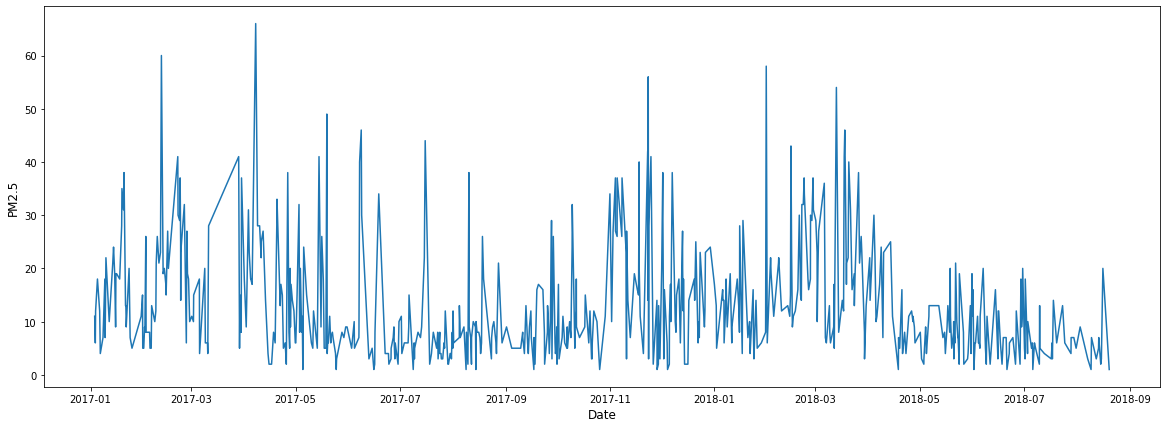

In [127]:
plt.figure(figsize=(20,7))
plt.plot(df_i['Fecha'], df_i['PM2.5'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5', fontsize=12)
plt.show()

## Exercise 1 plot the monthly PM2.5 of Usaquen staition

In [65]:
dfu = df_monitor[df_monitor['Estacion'] == 'Usaquen']
dfu

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
4708,2017-01-03 10:00:00,10,3,1,2017,2,Usaquen,11.0,-74.030417,4.710363
7477,2017-01-03 19:00:00,19,3,1,2017,2,Usaquen,6.0,-74.030417,4.710363
5358,2017-01-03 23:00:00,23,3,1,2017,2,Usaquen,12.0,-74.030417,4.710363
5198,2017-01-05 01:00:00,1,5,1,2017,4,Usaquen,18.0,-74.030417,4.710363
3598,2017-01-06 08:00:00,8,6,1,2017,5,Usaquen,12.0,-74.030417,4.710363
...,...,...,...,...,...,...,...,...,...,...
3645,2018-08-13 21:00:00,21,13,8,2018,1,Usaquen,7.0,-74.030417,4.710363
1149,2018-08-15 01:00:00,1,15,8,2018,3,Usaquen,2.0,-74.030417,4.710363
7084,2018-08-15 10:00:00,10,15,8,2018,3,Usaquen,3.0,-74.030417,4.710363
3630,2018-08-16 07:00:00,7,16,8,2018,4,Usaquen,20.0,-74.030417,4.710363


In [128]:
df_monthly = dfu.groupby(by=['Ano','Mes'])['PM2.5'].mean()

In [129]:
df_monthly = df_monthly.reset_index()

In [130]:
df_monthly['tm'] = df_monthly['Ano'].astype(str) + '-' + df_monthly['Mes'].astype(str)
df_monthly['tm'] = pd.to_datetime(df_monthly['tm'])
df_monthly

,Ano,Mes,PM2.5,tm
0,2017,1,15.562500,2017-01-01
1,2017,2,20.000000,2017-02-01
2,2017,3,14.666667,2017-03-01
3,2017,4,17.057143,2017-04-01
4,2017,5,11.921053,2017-05-01
5,2017,6,10.192308,2017-06-01
6,2017,7,7.157895,2017-07-01
7,2017,8,9.368421,2017-08-01
8,2017,9,8.735294,2017-09-01
9,2017,10,10.600000,2017-10-01


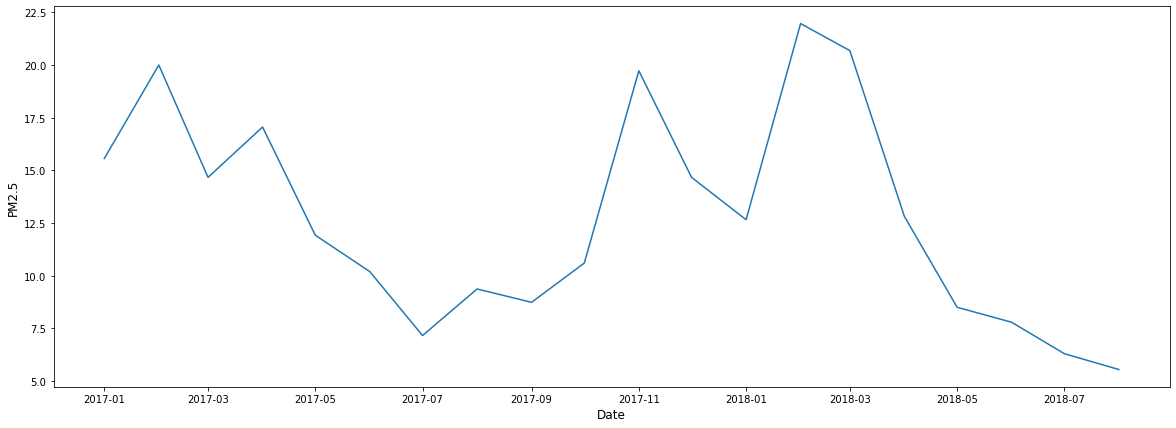

In [77]:
plt.figure(figsize=(20,7))
plt.plot(df_monthly['tm'], df_monthly['PM2.5'])
plt.xlabel('Month Time', fontsize=12)
plt.ylabel('PM2.5', fontsize=12)
plt.show()

## Exercise1 Subtract two lists:
Given two lists $l_1$ and $l_2$, write an function such that it subtract one list from another

In [ ]:
l1, l2 = [2,5,6,9], [6,9,8]

## return a list l1 - l2 = [2,5]

def listminus(li,lj):
    return


In [79]:
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Point, Polygon

In [85]:
from matplotlib.pyplot import axis


gdfmon  = gpd.GeoDataFrame(df_monitor, geometry=df_monitor[['Latitud','Longitud']].apply(lambda rw : Point(rw['Latitud'], rw['Longitud'])), axis=1)

KeyError: 'Latitud'

In [82]:
gdfmon

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud,geometry
5618,2017-01-01 02:00:00,2,1,1,2017,7,Centro de Alto Rendimiento,32.8,-74.083967,4.658479,None
4076,2017-01-01 04:00:00,4,1,1,2017,7,Guaymaral,10.0,-74.043783,4.783746,None
3903,2017-01-01 05:00:00,5,1,1,2017,7,Puente Aranda,8.1,-74.117483,4.631779,None
4817,2017-01-01 10:00:00,10,1,1,2017,7,Carvajal - Sevillana,7.2,-74.148583,4.595629,None
6778,2017-01-01 20:00:00,20,1,1,2017,7,Suba,12.0,-74.093483,4.761363,None
...,...,...,...,...,...,...,...,...,...,...,...
6125,2018-08-20 05:00:00,5,20,8,2018,1,Puente Aranda,3.2,-74.117483,4.631779,None
5433,2018-08-20 06:00:00,6,20,8,2018,1,Las Ferias,4.0,-74.082483,4.690713,None
1909,2018-08-20 06:00:00,6,20,8,2018,1,Guaymaral,6.0,-74.043783,4.783746,None
3415,2018-08-20 15:00:00,15,20,8,2018,1,Centro de Alto Rendimiento,1.7,-74.083967,4.658479,None
